## Data Pre-Processing

Import Packages and CSV

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option("display.max_columns", 100)

# Import dataset
df = pd.read_csv("dataset.csv")

# Print shape of dataset
print(df.shape)

(25480, 17)


In [101]:
# Display the first few rows to get a basic idea
df.head()

,CustomerID,Country,user_education,Gender,UsesAdvancedFeatures,AppEngagementSeconds,LastLoginDaysAgo,Profession,SubscriptionType,UsesVR,RenewSubscription,Age,DesignProjectScale,NumberOfDesigns,TutorialProgressionType,FrequencyOfDesignToolUsage,CustomerSupportCall
0,CUST00001,USA,High School,Male,N,14513,7,Hobbyist,Pay-as-you-go,Y,Yes,27.0,Small,19,Beginner,Weekly,N
1,CUST00002,USA,Master's,Female,N,2412,2,Architect,Basic,Y,Yes,27.0,Mixed-use,26,Not Attended,Monthly,N
2,CUST00003,USA,Bachelor's,Male,Y,44444,8,Hobbyist,Basic,Y,Yes,35.0,Medium,155,Advanced,Monthly,N
3,CUST00004,USA,Bachelor's,Male,N,98,103,Hobbyist,Basic,Y,Yes,48.0,Small,153,Intermediate,Monthly,N
4,CUST00005,Canada,Master's,Female,N,1082,5,Interior Designer,Basic,Y,No,29.0,Large,128,Beginner,Daily,Y


### Data Cleaning

Handling Missing values

* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset


Check Null Values

In [102]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), "% missing values")

In [103]:
features_with_na

[]

* There are no null values in the dataset

#### Other Data Cleaning steps

Handling Duplicates

In [104]:
df.duplicated().sum()

0

* No Duplicates in the dataset

Remove CustomerID from the dataset as it cannot used in Model Training

In [105]:
df.drop("CustomerID", inplace=True, axis=1)

## Feature Engineering

#### Feature Extraction

In [106]:
df.head()

,Country,user_education,Gender,UsesAdvancedFeatures,AppEngagementSeconds,LastLoginDaysAgo,Profession,SubscriptionType,UsesVR,RenewSubscription,Age,DesignProjectScale,NumberOfDesigns,TutorialProgressionType,FrequencyOfDesignToolUsage,CustomerSupportCall
0,USA,High School,Male,N,14513,7,Hobbyist,Pay-as-you-go,Y,Yes,27.0,Small,19,Beginner,Weekly,N
1,USA,Master's,Female,N,2412,2,Architect,Basic,Y,Yes,27.0,Mixed-use,26,Not Attended,Monthly,N
2,USA,Bachelor's,Male,Y,44444,8,Hobbyist,Basic,Y,Yes,35.0,Medium,155,Advanced,Monthly,N
3,USA,Bachelor's,Male,N,98,103,Hobbyist,Basic,Y,Yes,48.0,Small,153,Intermediate,Monthly,N
4,Canada,Master's,Female,N,1082,5,Interior Designer,Basic,Y,No,29.0,Large,128,Beginner,Daily,Y


Converting AppEngagementSeconds to minutes can enhance interpretability, align with industry standards, reduce data scale and variability, and facilitate more intuitive feature engineering and modeling.

In [107]:
df["AppEngagementMinutes"] = (df["AppEngagementSeconds"] / 60).round()

In [108]:
# After extraction we can drop AppEngagementSeconds
df.drop("AppEngagementSeconds", inplace=True, axis=1)

In [109]:
df.head()

,Country,user_education,Gender,UsesAdvancedFeatures,LastLoginDaysAgo,Profession,SubscriptionType,UsesVR,RenewSubscription,Age,DesignProjectScale,NumberOfDesigns,TutorialProgressionType,FrequencyOfDesignToolUsage,CustomerSupportCall,AppEngagementMinutes
0,USA,High School,Male,N,7,Hobbyist,Pay-as-you-go,Y,Yes,27.0,Small,19,Beginner,Weekly,N,242.0
1,USA,Master's,Female,N,2,Architect,Basic,Y,Yes,27.0,Mixed-use,26,Not Attended,Monthly,N,40.0
2,USA,Bachelor's,Male,Y,8,Hobbyist,Basic,Y,Yes,35.0,Medium,155,Advanced,Monthly,N,741.0
3,USA,Bachelor's,Male,N,103,Hobbyist,Basic,Y,Yes,48.0,Small,153,Intermediate,Monthly,N,2.0
4,Canada,Master's,Female,N,5,Interior Designer,Basic,Y,No,29.0,Large,128,Beginner,Daily,Y,18.0


##### Create IsActive column

* Let's create a binary feature from the LastLoginDaysAgo column based on a threshold to indicate user activity.

**No:** If LastLoginDaysAgo is greater than the threshold (indicating inactivity beyond the acceptable period).

**Yes:** If LastLoginDaysAgo is less than the threshold (indicating acceptable activity levels).

In [110]:
# Set threshold (14 days)
threshold = 14

# Create a new column based on the threshold
df["IsActive"] = df["LastLoginDaysAgo"].apply(lambda x: "No" if x > threshold else "Yes")

* The UsesAdvancedFeatures column can be dropped as it doesn't have much effect on the target variable, as shown in the EDA notebook by the visualisation and the chi2 test.

In [111]:
df.drop(columns=["UsesAdvancedFeatures"], axis=1, inplace=True)

In [112]:
# Let's check df
df.head()

,Country,user_education,Gender,LastLoginDaysAgo,Profession,SubscriptionType,UsesVR,RenewSubscription,Age,DesignProjectScale,NumberOfDesigns,TutorialProgressionType,FrequencyOfDesignToolUsage,CustomerSupportCall,AppEngagementMinutes,IsActive
0,USA,High School,Male,7,Hobbyist,Pay-as-you-go,Y,Yes,27.0,Small,19,Beginner,Weekly,N,242.0,Yes
1,USA,Master's,Female,2,Architect,Basic,Y,Yes,27.0,Mixed-use,26,Not Attended,Monthly,N,40.0,Yes
2,USA,Bachelor's,Male,8,Hobbyist,Basic,Y,Yes,35.0,Medium,155,Advanced,Monthly,N,741.0,Yes
3,USA,Bachelor's,Male,103,Hobbyist,Basic,Y,Yes,48.0,Small,153,Intermediate,Monthly,N,2.0,No
4,Canada,Master's,Female,5,Interior Designer,Basic,Y,No,29.0,Large,128,Beginner,Daily,Y,18.0,Yes


#### Check the type of features

In [113]:
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("Num of Numerical Features :", len(num_features))

Num of Numerical Features : 4


In [114]:
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print("Num of Categorical Features :", len(cat_features))

Num of Categorical Features : 12


In [115]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Num of Discrete Features :",len(discrete_features))

Num of Discrete Features : 0


In [116]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print("Num of Continuous Features :",len(continuous_features))

Num of Continuous Features : 4


#### Split X and Y

In [117]:
X = df.drop("RenewSubscription", axis=1)
y = df["RenewSubscription"]

In [118]:
y.head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: RenewSubscription, dtype: object

* Manual encoding target column

In [119]:
# If the target column has No value it is encoded as 1 others as 0
y = np.where(y=="No", 1, 0)

In [120]:
y

array([0, 0, 0, ..., 0, 0, 0])

## Feature Transformation

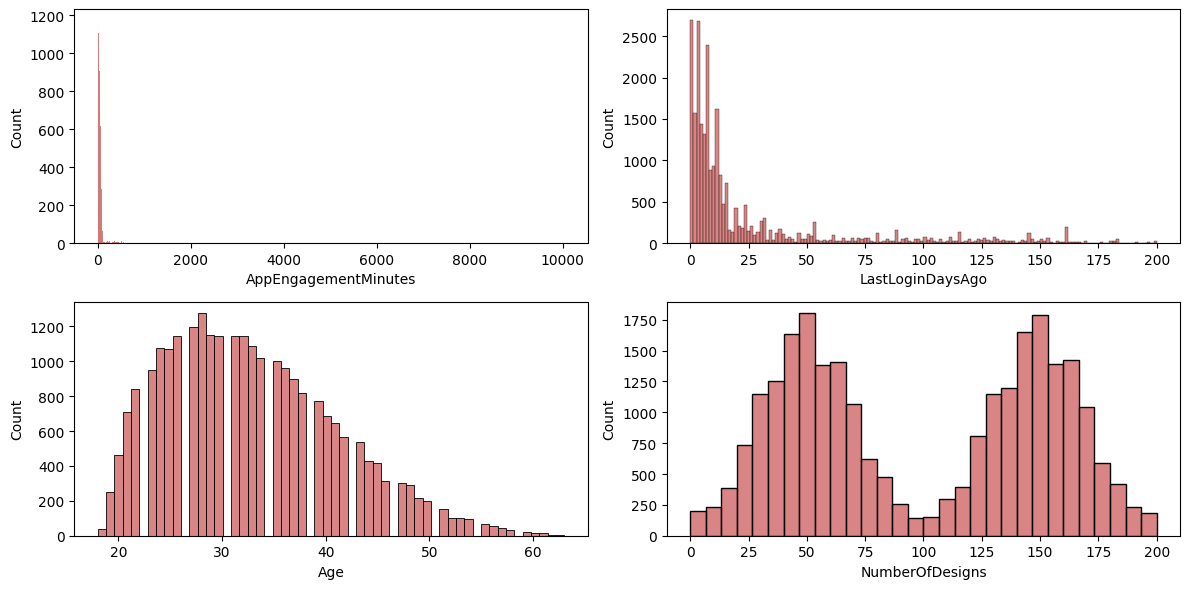

In [121]:
# Distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(["AppEngagementMinutes", "LastLoginDaysAgo", "Age", "NumberOfDesigns"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

* In particular, the AppEngagementMinutes and LastLoginDaysAgo columns are skewed.
* We can apply a featurewise power transformation to make the data more Gaussian.

Power transformations are a group of parametric, monotonic transformations used to make data resemble a normal distribution more closely. These are particularly helpful for addressing modeling problems associated with heteroscedasticity (non-uniform variance) or in cases where a normal distribution is preferable.

* At present, the PowerTransformer accommodates both the Box-Cox transform and the Yeo-Johnson transform.

##### Checking Skewness

* Skewness describes an imbalance or asymmetry in a dataset that diverges from the symmetric bell curve of a normal distribution. If this distribution curve leans to the left or right, it is considered skewed. Skewness quantifies how much a distribution deviates from a normal distribution

In [122]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

LastLoginDaysAgo         2.241802
Age                      0.583099
NumberOfDesigns          0.003848
AppEngagementMinutes    12.265331
dtype: float64

* Positiviely Skewed : LastLoginDaysAgo, AppEngagementMinutes.

#### Apply Power Transformer

In [123]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
transform_features = ["LastLoginDaysAgo", "AppEngagementMinutes"]
X_copy = pt.fit_transform(X[transform_features])

In [124]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

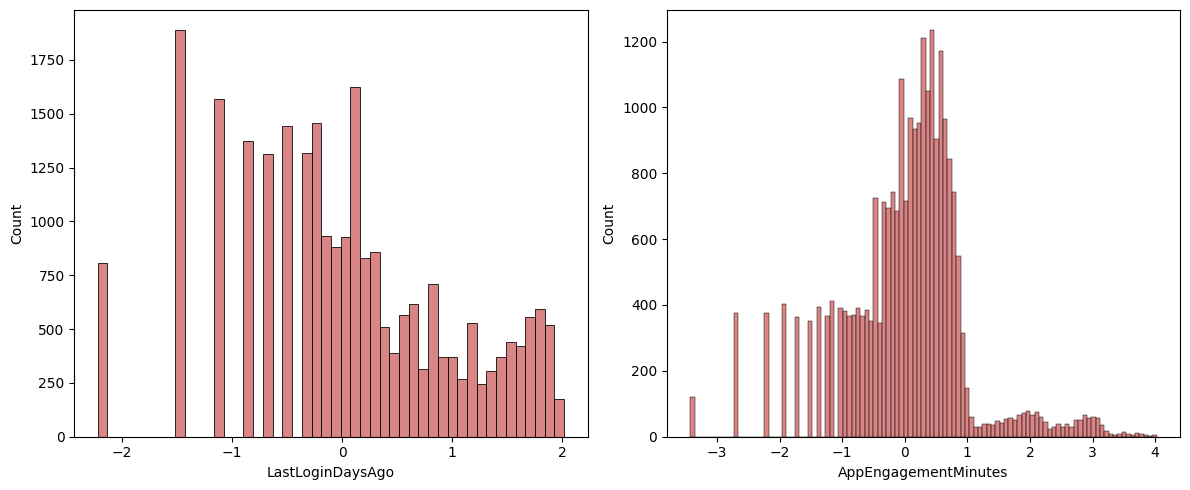

In [125]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

* Checking Skewness

In [126]:
X_copy.skew(axis=0, skipna=True)

LastLoginDaysAgo        0.025397
AppEngagementMinutes   -0.058911
dtype: float64

* So Power Transformer with yeo-johnson can be used.

**Effective Transformation:** The transformation applied to both LastLoginDaysAgo and AppEngagementMinutes appears to be highly effective, significantly reducing the skewness and thus normalizing these distributions. This is particularly beneficial for statistical modeling and analysis, as many algorithms assume or perform better with normally distributed data.

In [127]:
# Let's check unique values in categorical columns
for feature in cat_features:
    print(feature,':', df[feature].nunique())

Country : 6
user_education : 4
Gender : 2
Profession : 5
SubscriptionType : 4
UsesVR : 2
RenewSubscription : 2
DesignProjectScale : 4
TutorialProgressionType : 4
FrequencyOfDesignToolUsage : 3
CustomerSupportCall : 2
IsActive : 2


### Feature Encoding and Scaling

**One Hot Encoding**

* One Hot Encoding transforms categorical variables into a binary matrix representation that machine learning algorithms can work with more effectively. It's best applied to nominal categorical data with a manageable number of categories, as it adds a new binary column for each unique category.

**Ordinal Encoding**

* Ordinal Encoding is utilized for encoding ordinal variables—categorical data where the categories have a natural ordered relationship. It converts categories based on their given rank, making it suitable for features where the order impacts the outcome. It is often used in conjunction with ColumnTransformer for integrating directly into preprocessing pipelines.

**Standard Scaler**

* The Standard Scaler is a preprocessing technique that standardizes features by deducting the mean and scaling to unit variance. This scaler is particularly valuable for algorithms that are sensitive to the scale of the input data, such as support vector machines and k-nearest neighbors.

**Power Transformer**

* Power Transformers are applied to numerical input or output variables to transform them to have a Gaussian or more Gaussian-like distribution. This technique is beneficial for many statistical methods and machine learning algorithms that assume normality of the input variables.

In [128]:
# Selecting number features for preprocessing
num_features = list(X.select_dtypes(exclude="object").columns)

In [129]:
num_features

['LastLoginDaysAgo', 'Age', 'NumberOfDesigns', 'AppEngagementMinutes']

**Preprocessing using Column Transformer**

In [130]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the column names for each type of preprocessing
or_columns = ["user_education", "DesignProjectScale", "FrequencyOfDesignToolUsage", "SubscriptionType", "TutorialProgressionType", "IsActive", "CustomerSupportCall", "Gender", "UsesVR"]  # We can also encode columns with binary values in Ordinal Encoding.
oh_columns = ["Country", "Profession"]  # One-hot columns
transform_columns = ["AppEngagementMinutes", "LastLoginDaysAgo"]  # Columns to apply power transformation if skewed
num_features = ["LastLoginDaysAgo", "Age", "NumberOfDesigns", "AppEngagementMinutes"]  # Numeric columns for standard scaling


# Specify Category Order
education_order = ["High School", "Bachelor's", "Master's", "Doctorate"]  # Education level from lowest to highest
project_scale_order = ["Small", "Mixed-use", "Medium", "Large"]  # Project scale from smallest to largest
frequency_usage_order = ["Monthly", "Weekly", "Daily"]  # Usage frequency from least to most frequent
subscription_type_order = ["Pay-as-you-go", "Basic", "Premium", "Enterprise"] # Subscription type from basic to most comprehensive
tutorial_progressions_order = ["Not Attended", "Beginner", "Intermediate", "Advanced"] # From Not Attended to Advanced
is_active_order = ["Yes", "No"] # Binary
support_call_order = ["Y", "N"]
gender_order = ["Male", "Female"]
uses_vr_order = ["Y", "N"]

# Create transformers for each preprocessing step
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder(categories=[education_order, project_scale_order, 
                                             frequency_usage_order, subscription_type_order, 
                                             tutorial_progressions_order, is_active_order, support_call_order, gender_order, uses_vr_order])

# Create a pipeline for applying power transformation
transform_pipe = Pipeline(steps=[
    ("transformer", PowerTransformer(method="yeo-johnson"))
])

# Create the ColumnTransformer to apply different preprocessing to specific columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder="passthrough"  # Handles any columns not explicitly mentioned
)

#### Train Test Split

It's crucial to follow the correct sequence when splitting the dataset and applying transformations in a machine learning workflow. We should first split the dataset into training and testing sets before applying any transformations.

This sequence is important for several reasons:

* Prevent Data Leakage
* Simulate Real-World Scenarios
* Correct Application of Transformations

In [131]:
from sklearn.model_selection import train_test_split
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((20384, 15), (5096, 15))

#### Apply Preprocessor

 Fit and transform the training data using preprocessing pipeline. This step should be done before applying SMOTEENN because the synthetic samples generated by SMOTEENN should go through the same preprocessing steps as the actual data to maintain consistency.

In [132]:
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

#### Apply SMOTEENN

After preprocessing the training data,we need to apply SMOTEENN to handle the class imbalance. This ensures that the oversampling technique is applied to data that has already been scaled, encoded, etc., which helps in generating more meaningful synthetic samples.

In [133]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42, sampling_strategy="minority")
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_transformed, y_train)

#### Transform the Test Data

Transform the test data using the already fitted preprocessing pipeline. Note that we do not apply SMOTEENN to the test data.

In [134]:
X_test_transformed = preprocessor.transform(X_test)

### Model Training

In [135]:
# Let's import the necessary libraries for model training
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [136]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)  # Calculate Accuracy
    f1 = f1_score(true, predicted, average="binary")  # Calculate F1-score
    precision = precision_score(true, predicted, average="binary")  # Calculate Precision
    recall = recall_score(true, predicted, average="binary")  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted)  # Calculate Roc
    return acc, f1, precision, recall, roc_auc

def evaluate_models(X_train, y_train, X_test, y_test, models):
    '''
    This function takes in preprocessed and resampled X_train, y_train and the original X_test, y_test, 
    along with a dictionary of models. It evaluates each model and returns a DataFrame with the performance metrics.

    '''
    models_list = []
    accuracy_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    roc_auc_list = []

    for name, model in models.items():
        model.fit(X_train, y_train)  # Train model

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Evaluate performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        # Append results
        models_list.append(name)
        accuracy_list.append(model_test_accuracy)
        f1_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        roc_auc_list.append(model_test_rocauc_score)

        # Optional: Print results for each model
        print(f'Model performance for {name}:')
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("- F1 score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))
        print("="*35)
        print("\n")

    # Create and return a DataFrame with all results
    report = pd.DataFrame({
        "Model Name": models_list,
        "Accuracy": accuracy_list,
        "F1 Score": f1_list,
        "Precision": precision_list,
        "Recall": recall_list,
        "ROC AUC Score": roc_auc_list
    }).sort_values(by="Accuracy", ascending=False)
        
    return report

In [137]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [138]:
report = evaluate_models(X_train_resampled, y_train_resampled, X_test_transformed, y_test, models)

Model performance for Random Forest:
- Accuracy: 0.9064
- F1 score: 0.8582
- Precision: 0.8489
- Recall: 0.8678
- ROC AUC Score: 0.8965


Model performance for Decision Tree:
- Accuracy: 0.8811
- F1 score: 0.8275
- Precision: 0.7859
- Recall: 0.8738
- ROC AUC Score: 0.8792


Model performance for Gradient Boosting:
- Accuracy: 0.9072
- F1 score: 0.8592
- Precision: 0.8513
- Recall: 0.8672
- ROC AUC Score: 0.8969


Model performance for Logistic Regression:
- Accuracy: 0.7306
- F1 score: 0.6431
- Precision: 0.5667
- Recall: 0.7434
- ROC AUC Score: 0.7339


Model performance for K-Neighbors Classifier:
- Accuracy: 0.8356
- F1 score: 0.7694
- Precision: 0.7096
- Recall: 0.8401
- ROC AUC Score: 0.8367


Model performance for XGBClassifier:
- Accuracy: 0.9060
- F1 score: 0.8579
- Precision: 0.8471
- Recall: 0.8690
- ROC AUC Score: 0.8965


Model performance for CatBoosting Classifier:
- Accuracy: 0.9068
- F1 score: 0.8587
- Precision: 0.8503
- Recall: 0.8672
- ROC AUC Score: 0.8966


Model 

**Results of All Models**

In [140]:
report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
2,Gradient Boosting,0.907182,0.859184,0.851327,0.867188,0.896880
8,AdaBoost Classifier,0.906986,0.858929,0.850825,0.867188,0.896735
6,CatBoosting Classifier,0.906790,0.858673,0.850324,0.867188,0.896589
0,Random Forest,0.906397,0.858247,0.848912,0.867788,0.896453
5,XGBClassifier,0.906005,0.857906,0.847100,0.868990,0.896471
7,Support Vector Classifier,0.904631,0.855957,0.844444,0.867788,0.895141
1,Decision Tree,0.881083,0.827547,0.785946,0.873798,0.879207
4,K-Neighbors Classifier,0.835557,0.769400,0.709645,0.840144,0.836739
3,Logistic Regression,0.730573,0.643099,0.566651,0.743389,0.733874


#### Let's apply Hyper Parameter Tuning


* Gradient Boosting leads with the highest scores across all metrics, particularly excelling in accuracy and ROC AUC, making it a strong candidate for further tuning to possibly enhance its performance even more.

* We can select Gradient Boosting, Random Forest, and AdaBoost Classifier for further optimization using RandomizedSearchCV.

* These models represent a strategic choice for achieving robust predictive performance. Leveraging RandomizedSearchCV to tune their hyperparameters can effectively maximize their accuracy and overall prediction quality.

In [141]:
# Initialize few parameter for Hyperparamter tuning

gb_params = {
    "n_estimators": [100, 120, 140, 200, 250],
    "learning_rate": [0.1, 0.3, 0.4, 0.5],
    "max_depth": [3, 5, 7, 9, 13],
    "min_samples_split": [2, 3, 5, 15],
    "min_samples_leaf": [1, 3, 5, 7],
    "subsample": [0.3, 1.0],
    "max_features": ["sqrt", "log2", 0.5, None]
}



rf_params = {
    "max_depth": [None, 10, 15, 20, 30],
    "max_features": ["sqrt", "log2", 0.5, None],
    "n_estimators": [100, 120, 150, 250],
    "min_samples_split": [2, 6, 10, 14],
    "min_samples_leaf": [1, 3, 5, 7, 11],
    "criterion": ["gini", "entropy","log_loss"]
}



ada_params = {
    "n_estimators": [50, 55, 120, 150, 300],
    "learning_rate": [0.05, 0.1, 0.3, 0.5, 0.7, 0.9],
    "algorithm": ["SAMME", "SAMME.R"] 
}


In [142]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("Gradient Boosting", GradientBoostingClassifier(), gb_params),
    ("Random Forest", RandomForestClassifier(), rf_params),
    ("AdaBoost", AdaBoostClassifier(), ada_params)
]

In [143]:
from sklearn.model_selection import RandomizedSearchCV


model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=300, 
                                cv=5,  
                                scoring="accuracy",
                                verbose=2,
                                random_state=12,  
                                n_jobs=-1)
    random.fit(X_train_resampled, y_train_resampled)
    model_param[name] = random.best_params_

# Print out the best parameters for each model
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
---------------- Best Params for Gradient Boosting -------------------
{'subsample': 1.0, 'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 0.5, 'max_depth': 13, 'learning_rate': 0.4}
---------------- Best Params for Random Forest -------------------
{'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
---------------- Best Params for AdaBoost -------------------
{'n_estimators': 300, 'learning_rate': 0.9, 'algorithm': 'SAMME.R'}


In [144]:
model_param

{'Gradient Boosting': {'subsample': 1.0,
  'n_estimators': 120,
  'min_samples_split': 15,
  'min_samples_leaf': 7,
  'max_features': 0.5,
  'max_depth': 13,
  'learning_rate': 0.4},
 'Random Forest': {'n_estimators': 250,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'criterion': 'gini'},
 'AdaBoost': {'n_estimators': 300,
  'learning_rate': 0.9,
  'algorithm': 'SAMME.R'}}

#### Retraining the Model with best Parameters

In [145]:
from sklearn.metrics import roc_auc_score,roc_curve

best_models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(**model_param["Gradient Boosting"]),
    "Random Forest Classifier": RandomForestClassifier(**model_param["Random Forest"]),
    "AdaBoost Classifier": AdaBoostClassifier(**model_param["AdaBoost"]),
}

tuned_report = evaluate_models(X_train_resampled, y_train_resampled, X_test_transformed, y_test, best_models)

Model performance for Gradient Boosting Classifier:
- Accuracy: 0.9056
- F1 score: 0.8573
- Precision: 0.8465
- Recall: 0.8684
- ROC AUC Score: 0.8960


Model performance for Random Forest Classifier:
- Accuracy: 0.9064
- F1 score: 0.8582
- Precision: 0.8489
- Recall: 0.8678
- ROC AUC Score: 0.8965


Model performance for AdaBoost Classifier:
- Accuracy: 0.9072
- F1 score: 0.8593
- Precision: 0.8509
- Recall: 0.8678
- ROC AUC Score: 0.8970




In [146]:
tuned_report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
2,AdaBoost Classifier,0.907182,0.859268,0.850913,0.867788,0.897035
1,Random Forest Classifier,0.906397,0.858247,0.848912,0.867788,0.896453
0,Gradient Boosting Classifier,0.905612,0.857312,0.846514,0.868389,0.896025


In [147]:
best_model = AdaBoostClassifier(**model_param["AdaBoost"])
best_model = best_model.fit(X_train_resampled,y_train_resampled)
y_pred = best_model.predict(X_test_transformed)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'AdaBoost'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'AdaBoost'
Accuracy Score value: 0.9072
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3432
           1       0.85      0.87      0.86      1664

    accuracy                           0.91      5096
   macro avg       0.89      0.90      0.90      5096
weighted avg       0.91      0.91      0.91      5096



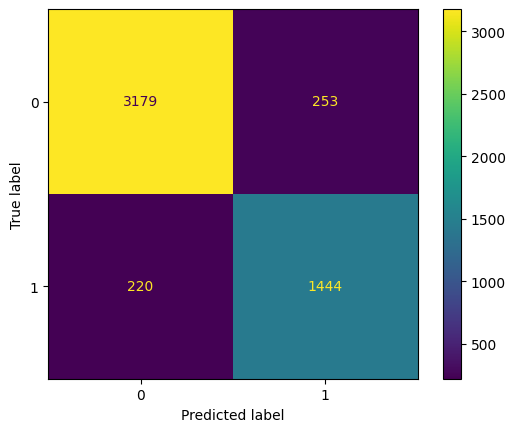

In [148]:
#  Display the confusion matrix for the best model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test_transformed, y_test)

# Best Model is AdaBoost with Accuracy 91%